how do I choose which model to use for my supervised learning task
how do I choose the best tuning parameters for the model
how do I estimate the accuracy of my model on out of sample data

In [ ]:
# Classification (output variable is categorical):Algorithms like Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVMs), 
# k-Nearest Neighbors (KNN), and Neural Networks are commonly used.
# Regression (output variable is continuous): Algorithms like Linear Regression, Decision Trees, Random Forests, Support Vector Regression (SVR), and Neural 
# Networks are typical choices.


In [3]:
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [4]:
# Evaluation Procedure # 1: Train and test on the entire dataset
iris = load_iris()
X = iris.data
Y = iris.target

                                                                            Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()

In [7]:
model.fit(X,Y)

c:\Users\Wakeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
Y_pred = model.predict(X)
len(Y_pred)

150

                                                Classification Accuracy
-> proportion of correct predictions
-> common evaluations metric for classification problems

In [10]:
from sklearn import metrics

In [ ]:
print(metrics.accuracy_score(Y,Y_pred) * 100) # this will compare the precited values to the original ones and give us the accuracy score
# This is known as training accuracy, when we train and test the model on the same data

97.33333333333334


                                                                    KNN

In [16]:
# for K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X,Y)
Y_pred = knn.predict(X)
print(metrics.accuracy_score(Y,Y_pred) * 100)

96.66666666666667


In [ ]:
# for K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,Y)
Y_pred = knn.predict(X)
print(metrics.accuracy_score(Y,Y_pred) * 100)
# now we conclude that k=1 knn will be the best for this dataset

100.0


                                            Problems with training and testing on same data
-> goal is to estimate likely performance of a model out_of_sample data
-> But maximizing training accuracy rewards overly complex models that won't necessarily generalize
-> Unnecessarily complex model overfit the training data

                                            Evaluation procedure #2: Train/test split
-> split datasett into two pieces:  a training set and a testing set
-> train the model on the training set and test the model on the testing set then evaluate how well we did

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [23]:
# Now creating model of logistic regression
model = LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
Y_pred = model.predict(X_test)

In [29]:
print(metrics.accuracy_score(Y_test,Y_pred) * 100) # with training and testing it was 97% but now its being 96.6%, So, train_test_split isn't good for this model
# on this dataset

96.66666666666667


In [ ]:
# Evaluating for knn as k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred) * 100) # it was 96.6% and same for this so for knn where k=5 the model can be work with splitting data or not

96.66666666666667


In [ ]:
# Evaluating for knn as k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred) * 100) # so, it was 100% first but now is 96.6% so splitting isn't good in this model for k=1

96.66666666666667


In [35]:
# Finding even better value for k. It is possible to evaluate it using for loop
scores = []
k_range = range(1,15)
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,Y_pred) * 100)
    print(f"for i={i}:", metrics.accuracy_score(Y_test, Y_pred) * 100)
# So it wiwll now gives more useful k values in splitting data context we can use 100% wali models

for i=1: 96.66666666666667
for i=2: 96.66666666666667
for i=3: 96.66666666666667
for i=4: 100.0
for i=5: 96.66666666666667
for i=6: 100.0
for i=7: 100.0
for i=8: 100.0
for i=9: 100.0
for i=10: 100.0
for i=11: 96.66666666666667
for i=12: 100.0
for i=13: 96.66666666666667
for i=14: 100.0


Text(0, 0.5, 'Testing accuracy')

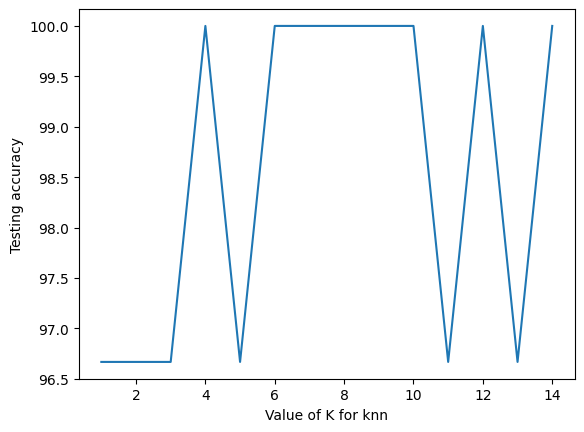

In [38]:
# Also we can use graph to visualize the accuracy score
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Value of K for knn")
plt.ylabel("Testing accuracy")

                                                        Making Predictions on Out-Of-Sample data

In [42]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,Y)
knn.predict([[3,5,4,2]])

array([1])

Downsides of train_test_split model
-> provides a high variance estimate of out of sample accuracy
-> k-fold cross validations overcomes this limitation
-> but train test split is still useful because of its flexibility and speed